# "*Aprender é fácil. Difícil é aprender como se aprende*"
---

# Aprendizagem Não Supervisionada e Supervisionada
---

Se eu quero ensinar uma criança a escrever **0** quando um número for **par** e **1** quando for **ímpar**, basta eu DIZER para ela fazer isso. Mas e para um computador?

Jarvis, se um número for par, me retorne 0. Retorne 1 caso contrário.
Obrigado e tenha um bom dia

Ok, não é tão simples... mas como nós sabemos programar, podemos fazer um código para isso!

In [1]:
def paridade(n):
    return n%2

print("Qual a paridade de 3?\n{}\n".format(paridade(3)))
print("Qual a paridade de 12?\n{}\n".format(paridade(12)))
print("Qual a paridade de 42?\n{}\n".format(paridade(42)))

Qual a paridade de 3?
1

Qual a paridade de 12?
0

Qual a paridade de 42?
0



Show! Nada que uma boa programação não resolva ;)

## Tá, mas é só isso? Basta ficar programando um punhado de regras de acordo com cada problema?

Calma jovem, hoje ainda é terça, acha que íamos ficar só enxugando gelo no resto do curso?

Deixa eu te contar uma história bem legal (só que não)...

## Era uma vez...

um casal de computólogos (Aberovaldo e Gertrudes) que gostavam muito de identificar padrões nas coisas(tudo doido) que estavam atrás de uma casa para morar. Um dia, eles estavam andando pela cidade quando viram algumas casas com uma placa de **VENDE-SE**. Eles notaram as seguintes casas:

* casa A: 50m², 2 andares
* casa B: 90m², 1 andar
* casa C: 100m², 1 andar
* casa D: 45m², 2 andares

Aberovaldo,jovem de muita lábia e que gostava de exibir para sua bela Gertrudes, disse: "*eu aposto a lavagem da louça da janta que as casas A e D tem os preços bem próximos, assim como as casas B e C*". Gertrudes, que não gosta de ser desafiada, aceitou a aposta.

Ao chegarem em casa, foram correndo para o site da imobiliária *Inside* e viram os seguintes anúncios:

* casa A: 50m², 2 andares - R\$ 200.000,00 
* casa B: 70m², 1 andar - R\$ 140.000,00 
* casa C: 80m², 1 andar - R\$ 160.000,00
* casa D: 45m², 2 andares - R\$ 180.000,00

Conforme aberovaldo havia *predito*, as casas A e D e as casas B e C tem preços bem parecidos.

## Ué, como que ele conseguiu acertar sem ter visto os preços ?

Aberovaldo percebeu o seguinte: algumas casas tinham menos metros quadrados, mas tinham mais andares(A e D), enquanto as outras tinham mais metros quadrados e menos andares(B e C). Logo, ele *identificou* que essas casas deveriam ter o preço mais parecido. 

Esse processo de *aprendizado* chama-se de aprendizado **não supervisionado**!

---

Gertrudes, não querendo se dar por vencida, lançou uma nova proposta: "*escolha qualquer casa do catálogo e me diga a área e o número de andares. Eu consigo acertar o preço (ou passar bem perto) de todas. Valendo o dobro ou nada!*"

**CHALLENGE ACCEPTED**

| Casa | Área | Andares | Palpite | Preço | 
| --- | --- | --- | --- | --- |
| E | 50m² | 1 | R\$ 100.000,00 | R\$ 100.000,00 |
| F | 100m² | 2 | R\$ 400.000,00 | R\$ 400.000,00 |
| G | 200m² | 1 | R\$ 400.000,00 | R\$ 410.000,00 |

É, pelo visto Gertrudes também manja das coisas. No fim das contas os dois cederam e pediram uma pizza

## Ok, a casa E eu até entendo ela acertar, mas e as outras ?

Gertrudes notou que parecia haver algum padrão entre os preços e os valores de área e número de andares da casa. Ela tentou encontrar uma equação que pudesse relacionar os valores, chegando na seguinte ideia: *preço da casa = 2000 $\times$ área da  casa $\times$ número de andares *. Se a gente fizer as contas, a fórmual bate com as 4 casas que eles viram na rua! Ela ainda acertou perfeitamente as casas E e F, mas acertou na trave a casa G... mas paciência, né? Pra quem ia pagar 400.000 reais, o q são mais 10.000? 

Esse processo de *aprendizado* chama-se de aprendizado **supervisionado**!

Existem diversas formas de se aprender, algumas super intuitivas, outras nem tanto. Neste curso vamos começar pelo aprendizado supervisionado, dando uma noção introdutória de aprendizagem

# Introdução à Aprendizagem Supervisionada
---

Suponhamos o seguinte conjunto de dados:

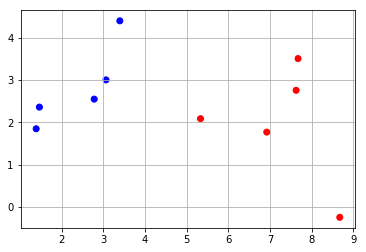

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

X = np.array([[ 2.7810836 ,  2.550537  ],
       [ 1.46548937,  2.36212508],  
       [ 3.39656169,  4.40029353],  
       [ 1.38807019,  1.85022032],  
       [ 3.06407232,  3.00530597],  
       [ 7.62753121,  2.75926224],
       [ 5.33244125,  2.08862677],
       [ 6.92259672,  1.77106367],
       [ 8.67541865, -0.24206865],
       [ 7.67375647,  3.50856301]])

Y = np.array([ 'b',  'b',  'b',  'b',  'b',  'r',  'r',  'r',  'r',  'r'])

plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.grid()

Suponha também que agora temos um novo dado(o qual está em vermelho na forma de um losângulo)

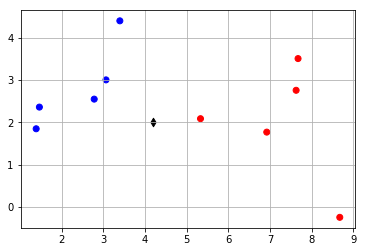

In [3]:
p_x = np.array([[4.2,2]])
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.scatter(p_x[:, 0], p_x[:, 1], c='k', marker='d')
plt.grid()

A qual grupo pertence esse novo elemento? Roxos ou amarelos?

Como que tomamos essa decisão?

Só tem um jeito de descobrir?

## "*Diga-me com quem tu andas que eu direi quem tu és*"

esse é o princípio mais intuitivo quando falamos sobre classificar dados. É natural à mente humana querer categorizar algo a partir de seus próximos. Sendo assim, nada mais justo do que utilizar essa filosofia como método de aprendizagem!

Esse método é chamado de **K-Nearest-Neighbors** (ou *kNN*, para os mais chegados). Ele é bem simples: um elemento pertence a classe dos elementos mais próximos a ele. Pronto. Fim.

Vamos identificar quem é o vizinho mais próximo de nosso novo ponto.

In [4]:
import pandas as pd

def dist_euclidiana(data, p):
    x = (data - p) ** 2
    return np.sqrt( np.sum(x, axis=1) )

df = pd.DataFrame(data=X)
df['color'] = Y
df['dist_euc'] = dist_euclidiana(X, p_x)
df = df.sort_values(by='dist_euc')
df

,0,1,color,dist_euc
6,5.332441,2.088627,r,1.135904
4,3.064072,3.005306,b,1.516895
0,2.781084,2.550537,b,1.521977
2,3.396562,4.400294,b,2.531190
7,6.922597,1.771064,r,2.732205
1,1.465489,2.362125,b,2.758384
3,1.388070,1.850220,b,2.815916
5,7.627531,2.759262,r,3.510620
9,7.673756,3.508563,r,3.787182
8,8.675419,-0.242069,r,5.005621


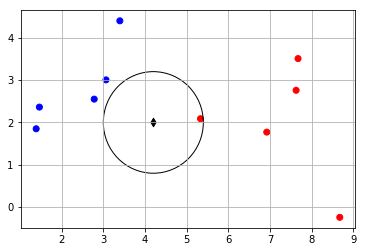

In [5]:
plt.scatter(X[:, 0], X[:, 1], c=Y)
plt.scatter(p_x[:, 0], p_x[:, 1], c='k', marker='d')
plt.grid()
plt.gcf().gca().add_artist(plt.Circle((p_x[0,0],p_x[0,1]),1.2, fill=False))

Na imagem acima, analisamos o elemento mais próximos. Ambos são roxos. Logo, podemos dizer que o novo dado também será roxo! Super simples!

Experimente agora aumentar o número de vizinhos para, digamos, analizar os 3 mais próximos. O que acontece?

## Legal, mas só posso usar o *kNN* para classificar os elementos? E se eu quisesse, digamos, estimar preços de casas?

Bom, vamos ver se da certo! Imagine que temos o seguinte conjunto de casas, onde temos a área (em m²) e o preço de cada uma delas:

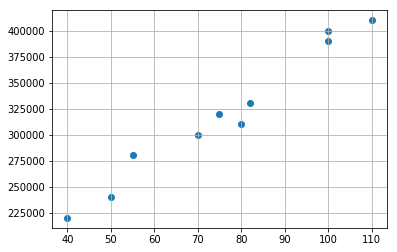

In [7]:
H = np.array([[100],
[110],  
[50],  
[70],  
[80],  
[40],
[100],
[55],
[75],
[82]])

P = np.array([400000, 410000, 240000, 300000, 310000, 220000, 390000, 280000, 320000, 330000])

plt.scatter(H[:,0], P)
plt.grid()

Imagine agora que você encontrou uma casa com área de 65m² mas não sabe o preço. Ela pode ser de qualquer valor!

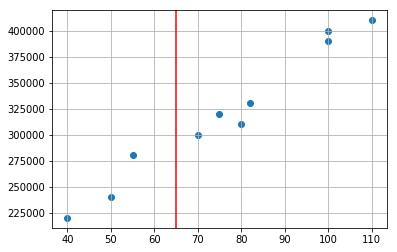

In [8]:
a = 65
plt.scatter(H[:,0], P)
plt.axvline(x=a,c="r")
plt.grid()

Se calcularmos uma distância euclidiana (que, nesse caso, seria apenas a diferença) entre as áreas, temos a seguinte tabela:

In [9]:
df = pd.DataFrame(data=H)
df['price'] = P
df['dist'] = np.abs(H[:,0]-a)
df = df.sort_values(by='dist')
df

,0,price,dist
3,70,300000,5
7,55,280000,10
8,75,320000,10
2,50,240000,15
4,80,310000,15
9,82,330000,17
5,40,220000,25
0,100,400000,35
6,100,390000,35
1,110,410000,45


Então, o que podemos fazer? Podemos usar o *kNN* para estimar o preço da casa? Se sim, como?

## Tá, você me convenceu, *kNN* é legal. Mas implementar isso deve ser chato...

Fazer queijo também dá trabalho, mas você não deixa de comer, certo? O que você faz? Pega um pronto!

Existe uma biblioteca em python chamada Scikit-Learn que já traz isso tudo implementado. Para esses exemplos, precisamos importar apenas 2 módulos:

In [11]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor

Agora, é só seguir 3 passos:
* Criar o modelo desejado, informando o número de vizinhos a serem consultados
* Ajustar seu modelo, mandando os dados que você já tem (*fit*)
* Estimar o valor do novo dado utilizando o modelo treinado (*predict*)

In [12]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, Y)
print("Que cor deve ser pintado o elemento localizado na coordenada ({}, {})? {}".\
      format(p_x[0,0], p_x[0,1], model.predict(p_x)[0]))

Que cor deve ser pintado o elemento localizado na coordenada (4.2, 2.0)? b


In [13]:
model = KNeighborsRegressor(n_neighbors=3)
model.fit(H,P)
print("Qual o preço da casa de área {} m²? {}".\
      format(a, model.predict([[a]])[0]))

Qual o preço da casa de área 65 m²? 300000.0


## Alguns questionamentos interessantes:

- Que valores de *k* devemos usar? Grandes? Pequenos? Médios?
- É uma boa ideia utilizar como *k* o número total de dados?
- Capitu traiu Bentinho?